In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

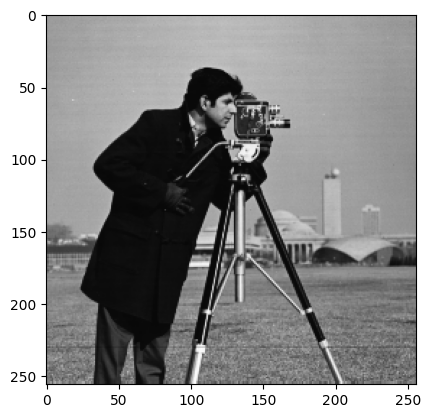

In [3]:
img = cv2.imread(r"cameraman.png",)
plt.imshow(img)

In [7]:
img.shape

(256, 256, 3)

In [ ]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [9]:
img.shape

(256, 256)

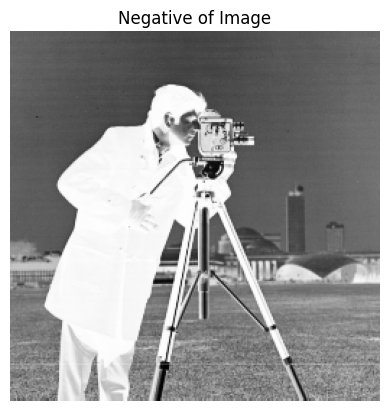

In [12]:
L= 255
L_neg= L-img
plt.imshow(L_neg,cmap='gray')
plt.title("Negative of Image")
plt.axis('off')
plt.show()

In [17]:
img.max()

np.uint8(253)

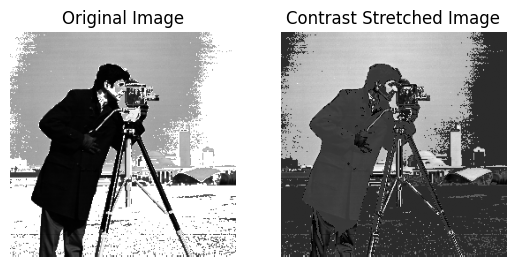

In [34]:
r_min , r_max = 20,220
contrast_img= ((img - r_min)/(r_max - r_min)*255).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(contrast_img,cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis('off')
plt.show()

In [ ]:
#contrast stretching
a, b = 70, 180      
v, w = 30, 220      
L = 256             
l = v / a
m = (w - v) / (b - a)
n = (L - 1 - w) / (L - 1 - b)


s = np.zeros_like(img)
mask1 = (img >= 0) & (img <= a)
mask2 = (img > a) & (img <= b)
mask3 = (img > b) & (img <= L - 1)
s[mask1] = l * img[mask1]
s[mask2] = m * (img[mask2] - a) + v
s[mask3] = n * (img[mask3] - b) + w
s = np.clip(s, 0, 255).astype(np.uint8)

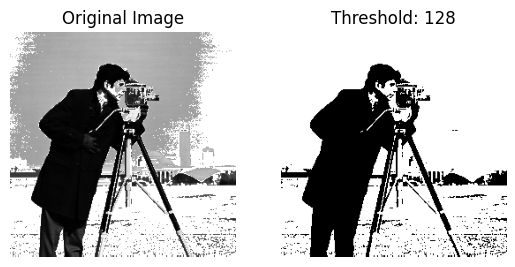

In [36]:
_, binary_img= cv2.threshold(img,128,255,cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary_img,cmap='gray')
plt.title("Threshold: 128")
plt.axis('off')
plt.show()

In [37]:
sliced_img= np.where((img>=40)&(img<=100), 255, 0).astype(np.uint8)
sliced_bg_img= np.where((img>=40)&(img<=100), 255, img).astype(np.uint8)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(sliced_img,cmap='gray')
plt.title("Gray Level Slicing")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sliced_bg_img,cmap='gray')
plt.title("Gray Level Slicing with Background")
plt.axis('off')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_37392\1193953166.py:2: RuntimeWarning: divide by zero encountered in log
  log_transformed= (c * np.log(1 + img)).astype(np.uint8)
C:\Users\Asus\AppData\Local\Temp\ipykernel_37392\1193953166.py:2: RuntimeWarning: invalid value encountered in cast
  log_transformed= (c * np.log(1 + img)).astype(np.uint8)


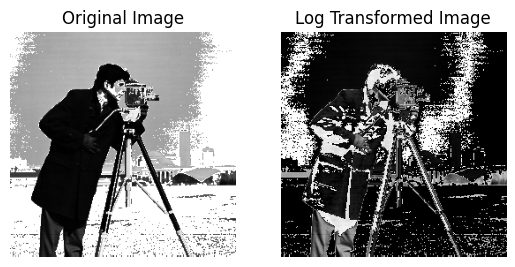

In [42]:
c=100
log_transformed= (c * np.log(1 + img)).astype(np.uint8)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(log_transformed,cmap='gray')
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()

In [45]:
gamma= 0.1
c=255/(np.max(img)**gamma)
power_law_transformed= (c * (img ** gamma)).astype(np.uint8)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(power_law_transformed,cmap='gray')
plt.title("Power-Law Transformed Image (γ=0.5)")
plt.axis('off')
plt.show()

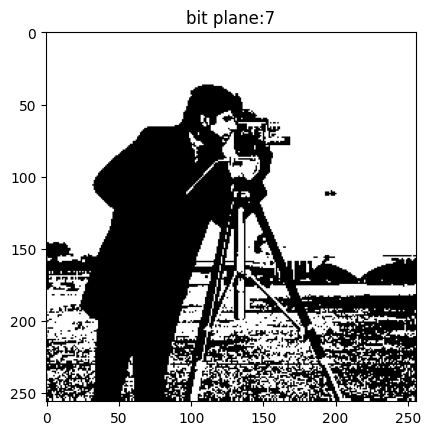

In [ ]:
bit_planes = []

for i in range(8):  # 8 bits for 8-bit image
    bit_plane = (img >> i) & 1
    bit_plane = bit_plane * 255  # for visualization
    bit_planes.append(bit_plane)

# Display bit planes
for i in range(8):
    plt.imshow(bit_planes[i])
    plt.title(f'bit plane:{i}')
